# 0. import dependencies

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# 1. The Data

## 1.1. Loading

In [3]:
data_dir = '/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/'

In [ ]:
os.listdir(data_dir)

['Test', 'Train']

In [ ]:
data_training = {}
data_testing = {}

In [ ]:
print ("** Mango Leaves Data set **")

for folders_Traing_Or_Testing in os.listdir(data_dir):

    folders_Traing_Or_Testing_path = os.path.join(data_dir,folders_Traing_Or_Testing)

    number_of_samples = 0

    print('**',folders_Traing_Or_Testing,'**')

    for diseases in os.listdir(folders_Traing_Or_Testing_path):

        diseases_path = os.path.join(folders_Traing_Or_Testing_path,diseases)


        samples = len(os.listdir(diseases_path))

        print(diseases , ":", samples)


        number_of_samples = number_of_samples + samples

        if folders_Traing_Or_Testing == "Test":
          data_testing[diseases] = samples
        else:
          data_training[diseases] = samples


    print("Number of samples for ", folders_Traing_Or_Testing," is ",number_of_samples)
    print("=================================================")


** Mango Leaves Data set **
** Test **
Powdary Mildew : 50
Scooty Mould : 50
Cutting Weevil : 30
Anthracnose : 50
Healthy : 50
Gall Midge : 50
Die Back : 50
Bacterial Canker : 49
Number of samples for  Test  is  379
** Train **
Bacterial Canker : 434
Sooty Mould : 450
Gall Midge : 432
Powdery Mildew : 448
Anthracnose : 428
Die Back : 437
Cutting Weevil : 220
Healthy : 450
Number of samples for  Train  is  3299


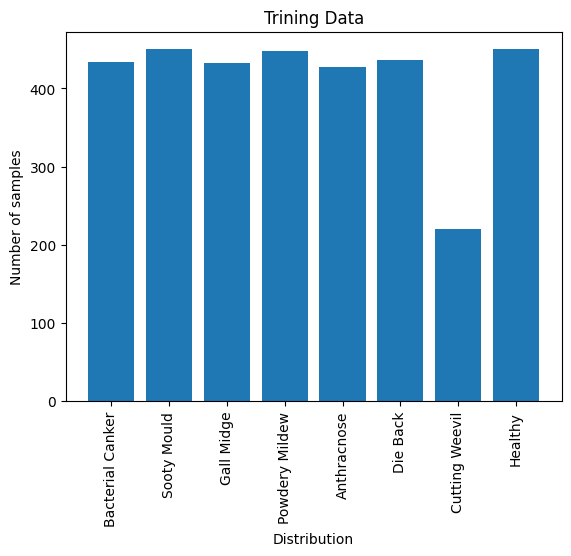

In [ ]:
data_training_array = np.array(list(data_training.values()))
plt.bar(data_training.keys(), data_training_array)
plt.xticks(rotation=90)
plt.xlabel("Distribution")
plt.ylabel("Number of samples")
plt.title("Trining Data")
plt.show()

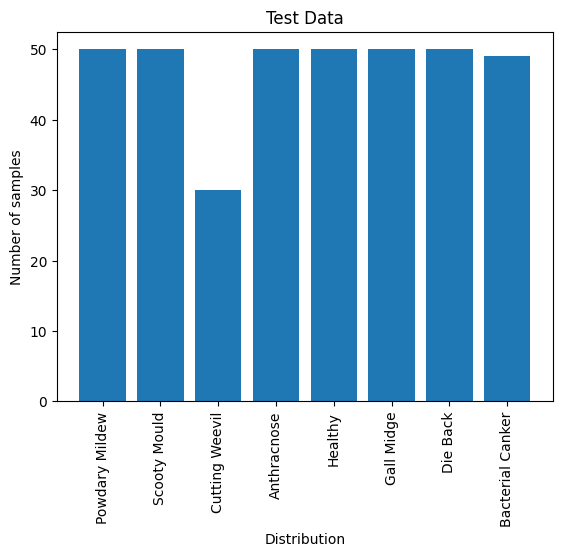

In [ ]:
data_testing_array = np.array(list(data_testing.values()))
plt.bar(data_testing.keys(), data_testing_array)
plt.xticks(rotation=90)
plt.xlabel("Distribution")
plt.ylabel("Number of samples")
plt.title("Test Data")
plt.show()

## 1.2. visualize images

Text(0.5, 1.0, 'Sooty_Mould')

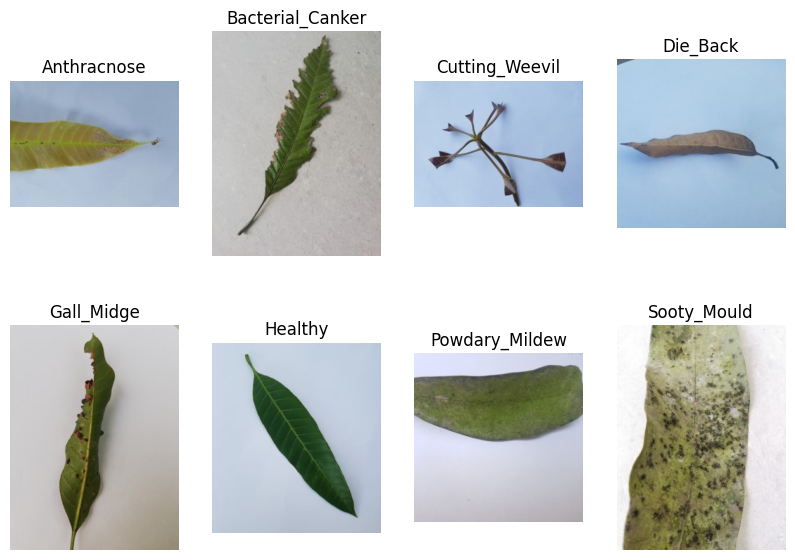

In [ ]:
fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 4

Anthracnose= np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Anthracnose/20211008_124249 (Custom).jpg')))
Bacterial_Canker = np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Bacterial Canker/IMG_20211106_120700 (Custom).jpg')))
Cutting_Weevil = np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Cutting Weevil/20211011_131104 (Custom).jpg')))
Die_Back = np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Die Back/20211129_160425 (Custom).jpg')))
Gall_Midge= np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Gall Midge/IMG_20211106_161101 (Custom).jpg')))
Healthy = np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Healthy/20211231_123123 (Custom).jpg')))
Powdary_Mildew = np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Powdery Mildew/20211109_121158 (Custom).jpg')))
Sooty_Mould = np.array(PIL.Image.open(str('/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/Sooty Mould/IMG_20211108_120228 (Custom).jpg')))


fig.add_subplot(rows, columns, 1)

plt.imshow(Anthracnose)
plt.axis('off')
plt.title("Anthracnose")


fig.add_subplot(rows, columns, 2)

plt.imshow(Bacterial_Canker)
plt.axis('off')
plt.title("Bacterial_Canker")


fig.add_subplot(rows, columns, 3)

plt.imshow(Cutting_Weevil)
plt.axis('off')
plt.title("Cutting_Weevil")


fig.add_subplot(rows, columns, 4)

plt.imshow(Die_Back)
plt.axis('off')
plt.title("Die_Back")


fig.add_subplot(rows, columns, 5)

plt.imshow(Gall_Midge)
plt.axis('off')
plt.title("Gall_Midge")


fig.add_subplot(rows, columns, 6)

plt.imshow(Healthy)
plt.axis('off')
plt.title("Healthy")


fig.add_subplot(rows, columns, 7)

plt.imshow(Powdary_Mildew)
plt.axis('off')
plt.title("Powdary_Mildew")


fig.add_subplot(rows, columns, 8)

plt.imshow(Sooty_Mould)
plt.axis('off')
plt.title("Sooty_Mould")

# 2. Training

## 2.1. Transfer Learning

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/',
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(299, 299),
  batch_size=32,
  label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Mango_leaf/data/MangoLeafBD_Without_Testset_Augmentation/Train/',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(299, 299),
  batch_size=32,
  label_mode='categorical'
)




Found 3299 files belonging to 8 classes.
Using 2970 files for training.
Found 3299 files belonging to 8 classes.
Using 329 files for validation.
Found 379 files belonging to 8 classes.


In [7]:
train_ds.class_names

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomBrightness(factor=0.2),
  tf.keras.layers.RandomContrast(factor=0.2),
])

In [ ]:
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [ ]:
IMG_SIZE = (299, 299)
IMG_SHAPE = IMG_SIZE + (3,)
IMG_SHAPE

(299, 299, 3)

In [ ]:
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(299, 299, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(8, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 299, 299, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 299, 299, 3)       0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

In [ ]:
history = model.fit(train_ds,
                    epochs=20,
                    validation_data=val_ds,
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3))

Epoch 1/20
93/93 [==============================] - 617s 6s/step - loss: 1.7986 - accuracy: 0.3657 - val_loss: 1.3906 - val_accuracy: 0.6657
Epoch 2/20
93/93 [==============================] - 16s 165ms/step - loss: 1.1343 - accuracy: 0.7293 - val_loss: 0.9543 - val_accuracy: 0.8207
Epoch 3/20
93/93 [==============================] - 16s 160ms/step - loss: 0.8080 - accuracy: 0.8444 - val_loss: 0.7173 - val_accuracy: 0.8815
Epoch 4/20
93/93 [==============================] - 17s 168ms/step - loss: 0.6304 - accuracy: 0.8845 - val_loss: 0.5838 - val_accuracy: 0.8967
Epoch 5/20
93/93 [==============================] - 16s 161ms/step - loss: 0.5234 - accuracy: 0.8912 - val_loss: 0.4911 - val_accuracy: 0.9027
Epoch 6/20
93/93 [==============================] - 16s 163ms/step - loss: 0.4416 - accuracy: 0.9152 - val_loss: 0.4293 - val_accuracy: 0.9149
Epoch 7/20
93/93 [==============================] - 15s 160ms/step - loss: 0.3937 - accuracy: 0.9195 - val_loss: 0.3827 - val_accuracy: 0.9301
E

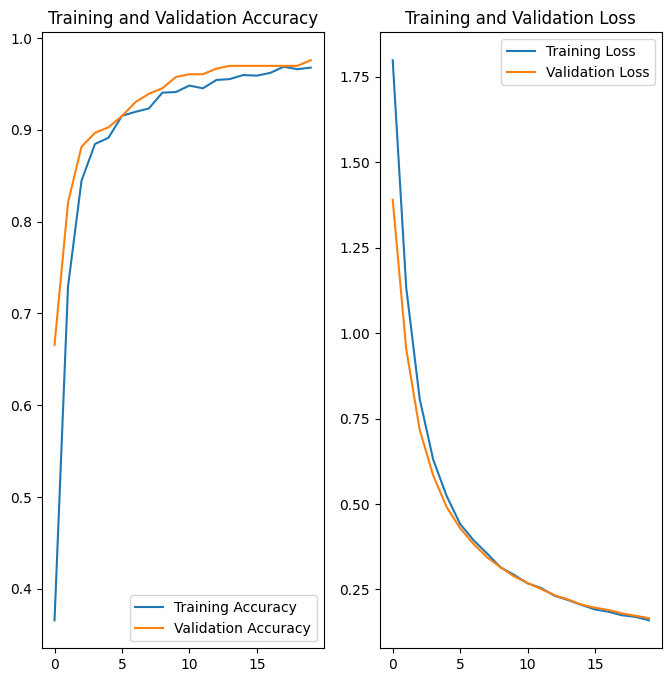

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Mango_leaf/Model/inceptionV3_TransferLearning_MangoLeafBD.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
len(model.trainable_variables)

2

## 2.2. Fine-Tuning

In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 240

Number of layers in the base model:  311


In [ ]:
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001/10),
              metrics = ['accuracy'])

In [ ]:
len(model.trainable_variables)

42

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 299, 299, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 299, 299, 3)       0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

In [ ]:
fine_tune_epochs = 10
total_epochs =  20 + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds,
                         callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3))

Epoch 20/30
93/93 [==============================] - 21s 210ms/step - loss: 0.0205 - accuracy: 0.9956 - val_loss: 0.0205 - val_accuracy: 0.9939
Epoch 21/30
93/93 [==============================] - 19s 202ms/step - loss: 0.0111 - accuracy: 0.9983 - val_loss: 0.0186 - val_accuracy: 0.9939
Epoch 22/30
93/93 [==============================] - 20s 205ms/step - loss: 0.0053 - accuracy: 0.9997 - val_loss: 0.0109 - val_accuracy: 0.9970
Epoch 23/30
93/93 [==============================] - 19s 200ms/step - loss: 0.0073 - accuracy: 0.9990 - val_loss: 0.0229 - val_accuracy: 0.9878
Epoch 24/30
93/93 [==============================] - 20s 206ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 25/30
93/93 [==============================] - 19s 199ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 26/30
93/93 [==============================] - 19s 200ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0053 - val_accuracy:

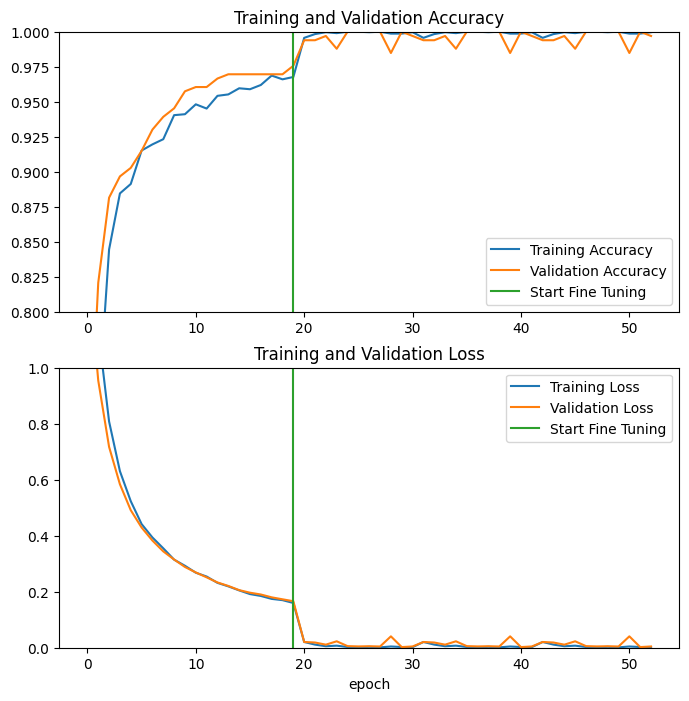

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([20-1,20-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([20-1,20-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Mango_leaf/Model/inceptionV3_Fine-Tuning_MangoLeafBD.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
